# **Installing dependencies and libraries required**


In [1]:
pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/25/31/52443f47e743d53ba1c9e8324e1a2eb0527df01d96d9174868c698b00d75/tensorflow-2.18.0-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.18.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/da/36/236fbd868b6c91309a5206bd90c3f881f4f44b2d997cd1d6239ef652f878/matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/a1/73/7a9ed7935f6833d73b32f1e2a1210082f5ccb95445440b4e2b0f66ab7792/tensorflow_datasets-4.9.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.m

In [3]:
import tensorflow as tf


/Users/amberb/Documents/Gans/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.8.0
appnope                      0.1.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.3.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
certifi                      2024.12.14
cffi                         1.17.1
charset-normalizer           3.4.1
click                        8.1.8
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.12
decorator                    5.1.1
defusedxml                   0.7.1
dm-tree                      0.1.8
etils                        1.

In [5]:
#importing dataset for Fashion_MNIST
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [6]:
ds=tfds.load('fashion_mnist',split='train')

In [7]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [8]:
 ds.as_numpy_iterator().next()['label']

2025-01-23 14:16:32.476649: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-23 14:16:32.482710: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


np.int64(2)

**Data visualize and dataset builiding**

In [9]:
#setup connection aka iterator
dataiter=ds.as_numpy_iterator()

In [10]:
#getting data out from pipeline
dataiter.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

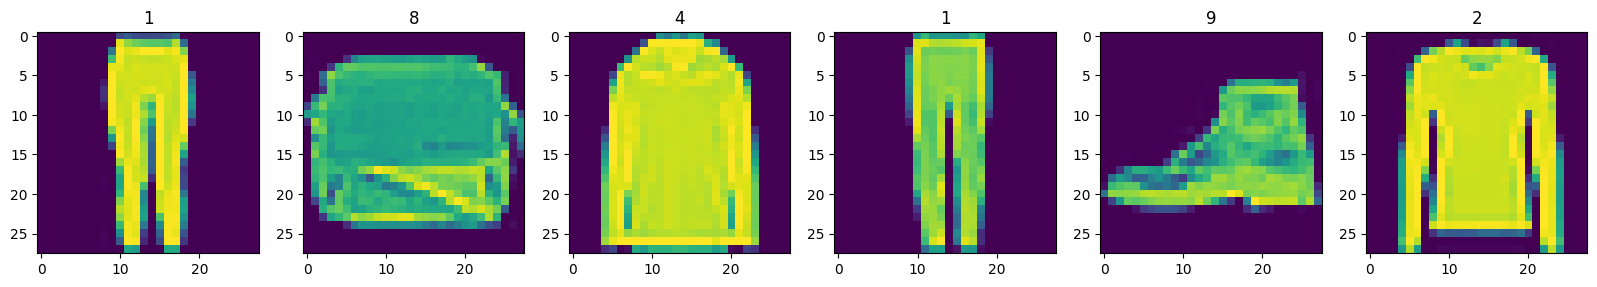

In [11]:
import numpy as np
fig,ax = plt.subplots(ncols=6,figsize=(20,20))
for idx in range(6):
  sample=dataiter.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [12]:
#data processing scaling these values between (0,1) from original (0,255)
def scale_image(data):
  image=data['image']
  return image/255


In [13]:
#pipeline optimizing techniques for the tf.dataset
ds=tfds.load('fashion_mnist',split='train')
ds=ds.map(scale_image)#map transformation preprocessing for scale_images
ds=ds.cache()#cache the dataset for easy fecth
ds=ds.shuffle(60000)#random shuffle 60000 images for better training
ds=ds.batch(128)#batch into 128 images per sample
ds=ds.prefetch(64)#reduces the likelihood of bottlenecking

In [14]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

***Building Neural Net model:***

*   Generator
*   Discriminator

In [15]:
#import modelling components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [16]:
#building a generator
def build_generator():
  model=Sequential()
  #take in random value and reshapes it to 7x7x128
  #beginning of generated image
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=5,padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=6,padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [17]:

generator=build_generator()


/Users/amberb/Documents/Gans/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/amberb/Documents/Gans/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:

import statsmodels.api as sm
generator.summary()

ModuleNotFoundError: No module named 'statsmodels'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


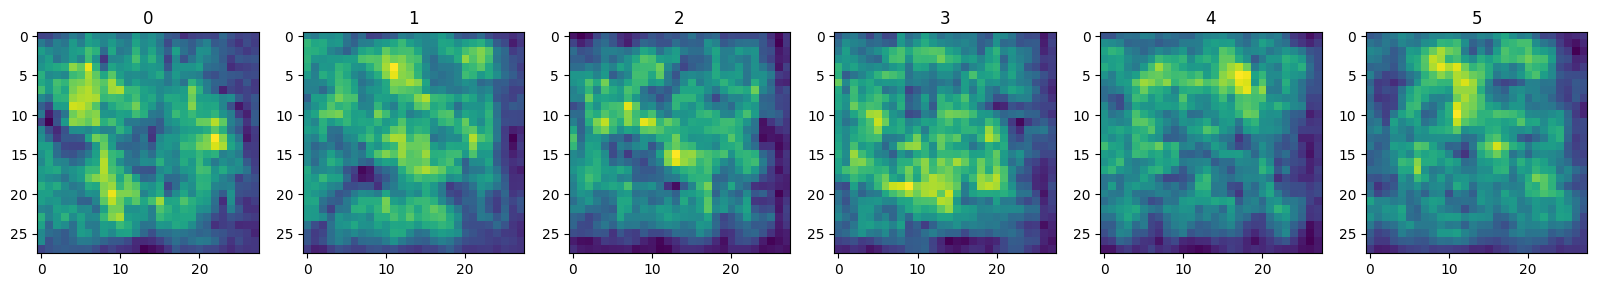

In [19]:
img =generator.predict(np.random.randn(6,128,1))
fig,ax = plt.subplots(ncols=6,figsize=(20,20))
for idx,img in enumerate(img):

  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [20]:
#builiding a discriminator
def build_discriminator():
  model=Sequential()

  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))



  return model

In [21]:
discriminator=build_discriminator()
discriminator.summary()

/Users/amberb/Documents/Gans/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
img = generator.predict(np.random.randn(6,128,1))

img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


(6, 28, 28, 1)

In [23]:
img

array([[[[0.51692516],
         [0.52306   ],
         [0.53201395],
         ...,
         [0.49806523],
         [0.49401337],
         [0.49824035]],

        [[0.53809005],
         [0.51804435],
         [0.53189456],
         ...,
         [0.49275777],
         [0.49402994],
         [0.49900413]],

        [[0.53413576],
         [0.51013154],
         [0.5252832 ],
         ...,
         [0.49738258],
         [0.5001116 ],
         [0.5051526 ]],

        ...,

        [[0.5209448 ],
         [0.51267457],
         [0.51875025],
         ...,
         [0.4993645 ],
         [0.5031036 ],
         [0.50444275]],

        [[0.5104915 ],
         [0.50441486],
         [0.50795263],
         ...,
         [0.510181  ],
         [0.5031326 ],
         [0.5019305 ]],

        [[0.50355023],
         [0.5041043 ],
         [0.5045365 ],
         ...,
         [0.50734925],
         [0.5029676 ],
         [0.5018648 ]]],


       [[[0.5181845 ],
         [0.5217541 ],
         [0.51

In [24]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.49912554],
       [0.49920937],
       [0.49946338],
       [0.4992282 ],
       [0.4996536 ],
       [0.49907133]], dtype=float32)

**construct training loop**

In [25]:
#adam as optimizer for both models
from tensorflow.keras.optimizers import Adam
#BinaryCrossEntropy as loss for both
from tensorflow.keras.losses import BinaryCrossentropy


In [26]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()


In [27]:
#building subclassed model
#importing the base model class to subclass our training step
from tensorflow.keras.models import Model


In [28]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[ 0.7112585 ],
        [ 0.9522988 ],
        [ 0.25305378],
        [-1.3105228 ],
        [-0.6356662 ],
        [-1.2753791 ],
        [-0.9467743 ],
        [ 1.3198006 ],
        [ 0.77086455],
        [-0.09868883],
        [-0.39173365],
        [-0.22365199],
        [-1.1941351 ],
        [ 0.8852645 ],
        [-0.14875655],
        [ 1.6128031 ],
        [-0.10053223],
        [ 0.3250285 ],
        [-0.93801934],
        [ 1.0433058 ],
        [-1.9481939 ],
        [-0.58499366],
        [-0.09074548],
        [-0.7548125 ],
        [ 0.7590058 ],
        [ 0.43818814],
        [-0.3433497 ],
        [ 0.5610719 ],
        [-0.00789045],
        [ 0.78582895],
        [-1.6310916 ],
        [-0.42237085],
        [-1.6322726 ],
        [ 1.3535321 ],
        [ 1.505788  ],
        [-0.7567486 ],
        [ 0.37208092],
        [-1.357729  ],
        [ 0.43646955],
        [-0.06107926],
        [-0.08061101],
    

In [29]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    #pass through args and kwargs to base class
    super().__init__(*args,**kwargs)

    #create atrributes fror gen and discri
    self.generator=generator
    self.discriminator=discriminator

  def compile(self, g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def  train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)

    #train the discriminator
    with tf.GradientTape() as d_tape:

     #pass real and fake images to discriminator model
     yhat_real=self.discriminator(real_images,training=True)
     yhat_fake=self.discriminator(fake_images,training=True)
     yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)

     #Create labels for Real and fake images
     y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

     #Add some noise to outputs(true O/Ps)
     noise_reali=0.15*tf.random.uniform(tf.shape(yhat_real))
     noise_fakei=0.15*tf.random.uniform(tf.shape(yhat_fake))
     y_realfake+=tf.concat([noise_reali,noise_fakei],axis=0)

     #Calculate loss -BinaryCross Entropy

     total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    #apply Back Prop -NN learn
    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))


    #train the discriminator
    with tf.GradientTape() as g_tape:
      #generate some new images
      gen_imagess=self.generator(tf.random.normal((128,128,1)),training=True)

      #create the predicted labels
      predicted_labels=self.discriminator(gen_imagess,training=False)

      #calculate the loss
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    #apply backprop
    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return{"d_loss":total_d_loss,"g_loss":total_g_loss}

In [30]:
fashgn=FashionGAN(generator,discriminator)


In [31]:
fashgn.compile(g_opt,d_opt,g_loss,d_loss)

Building Callback

In [32]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback


In [33]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

Train

In [34]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [35]:
hist=fashgn.fit(ds,epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
 10/469 ━━━━━━━━━━━━━━━━━━━━ 41:08 5s/step - d_loss: 0.6925 - g_loss: 0.6988

KeyboardInterrupt: 

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [ ]:
generator.load_weights(os.path.join('archive', '/content/generatormodel.h5'))

In [ ]:
imgs=generator.predict(tf.random.normal((6,128,1)))
imgs

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(10,10))
for r in range(6):
    for c in range(6):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])